In [1]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 60.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import spacy
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
nlp = spacy.load("en_core_web_sm")

In [4]:
text = """
Apple Inc. was founded by Steve Jobs and Steve Wozniak in California in 1976.
Microsoft was founded by Bill Gates in the United States.
Barack Obama was born in Hawaii on August 4, 1961.
Google is headquartered in Mountain View.
"""

doc = nlp(text)

In [5]:
entities = []

for ent in doc.ents:
    if ent.label_ in ["PERSON", "ORG", "GPE", "DATE"]:
        entities.append((ent.text, ent.label_))

entities

[('Apple Inc.', 'ORG'),
 ('Steve Jobs', 'PERSON'),
 ('Steve Wozniak', 'PERSON'),
 ('California', 'GPE'),
 ('1976', 'DATE'),
 ('Microsoft', 'ORG'),
 ('Bill Gates', 'PERSON'),
 ('the United States', 'GPE'),
 ('Barack Obama', 'PERSON'),
 ('Hawaii', 'GPE'),
 ('August 4, 1961', 'DATE'),
 ('Google', 'ORG'),
 ('Mountain View', 'GPE')]

In [6]:
from spacy import displacy

displacy.render(doc, style="ent", jupyter=True)

In [7]:
entity_labels = [ent.label_ for ent in doc.ents
                 if ent.label_ in ["PERSON", "ORG", "GPE", "DATE"]]

entity_count = Counter(entity_labels)

entity_count

Counter({'ORG': 3, 'PERSON': 4, 'GPE': 4, 'DATE': 2})

In [8]:
df = pd.DataFrame(entity_count.items(), columns=["Entity Type", "Count"])
df

,Entity Type,Count
0,ORG,3
1,PERSON,4
2,GPE,4
3,DATE,2


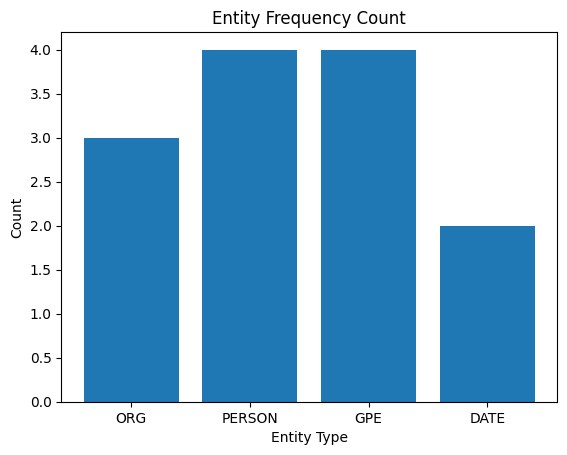

In [9]:
plt.figure()
plt.bar(df["Entity Type"], df["Count"])
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.title("Entity Frequency Count")
plt.show()